In [1]:
import json
import matplotlib.pyplot as plt

with open("medium-high-critical-report.json", "r") as file:
    data = json.load(file)

with open("prettified-medium-high-critical-report.json", "w") as outfile:
    json.dump(data, outfile, indent=4)

print("Formatted JSON saved as 'prettified-medium-high-critical-report.json'")

Formatted JSON saved as 'prettified-medium-high-critical-report.json'


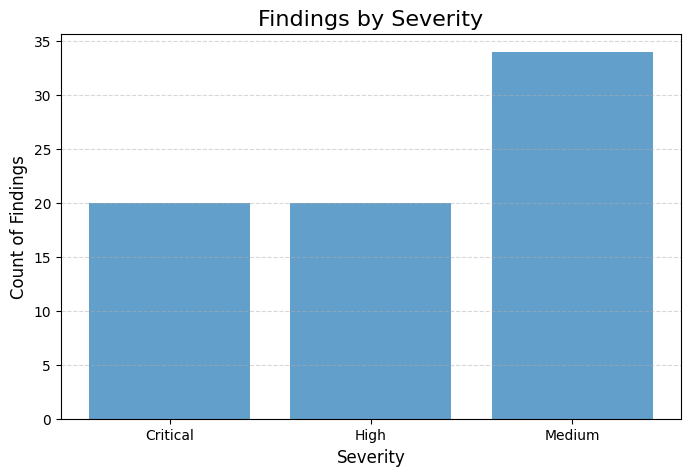

In [2]:
# Count findings by severity
severity_counts = {severity.capitalize(): len(findings) for severity, findings in data.items()}

# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(severity_counts.keys(), severity_counts.values(), alpha=0.7)
plt.title("Findings by Severity", fontsize=16)
plt.xlabel("Severity", fontsize=12)
plt.ylabel("Count of Findings", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


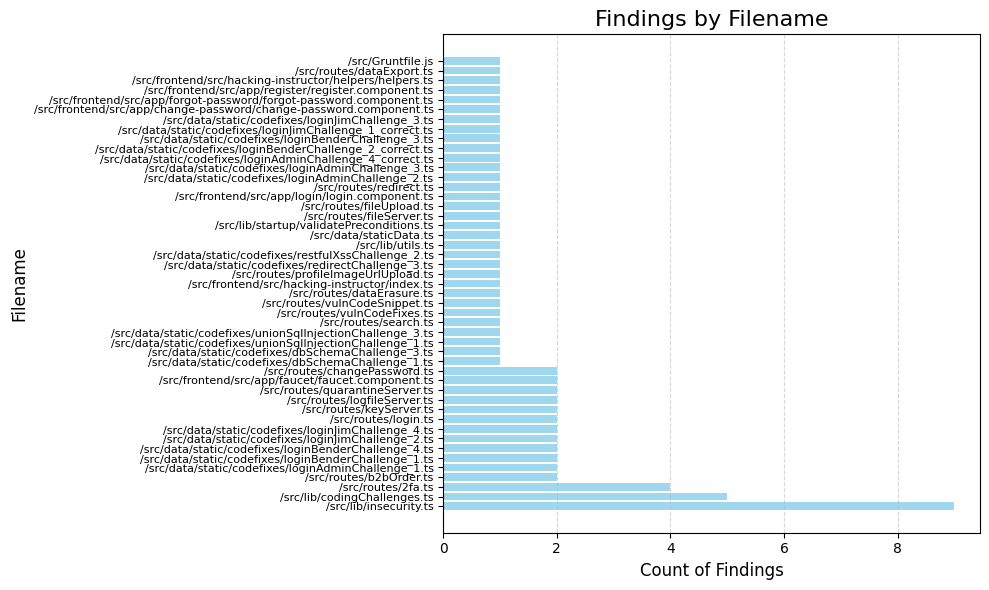

In [3]:
# Aggregate findings by `full_filename`
filename_counts = {}
for severity, findings in data.items():
    for finding in findings:
        filename = finding["full_filename"]
        filename_counts[filename] = filename_counts.get(filename, 0) + 1

# Sort filenames by counts for better visualization
sorted_filenames = sorted(filename_counts.items(), key=lambda x: x[1], reverse=True)

# Separate keys and values for plotting
filenames = [item[0] for item in sorted_filenames]
counts = [item[1] for item in sorted_filenames]

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(filenames, counts, color="skyblue", alpha=0.8)
plt.title("Findings by Filename", fontsize=16)
plt.xlabel("Count of Findings", fontsize=12)
plt.ylabel("Filename", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

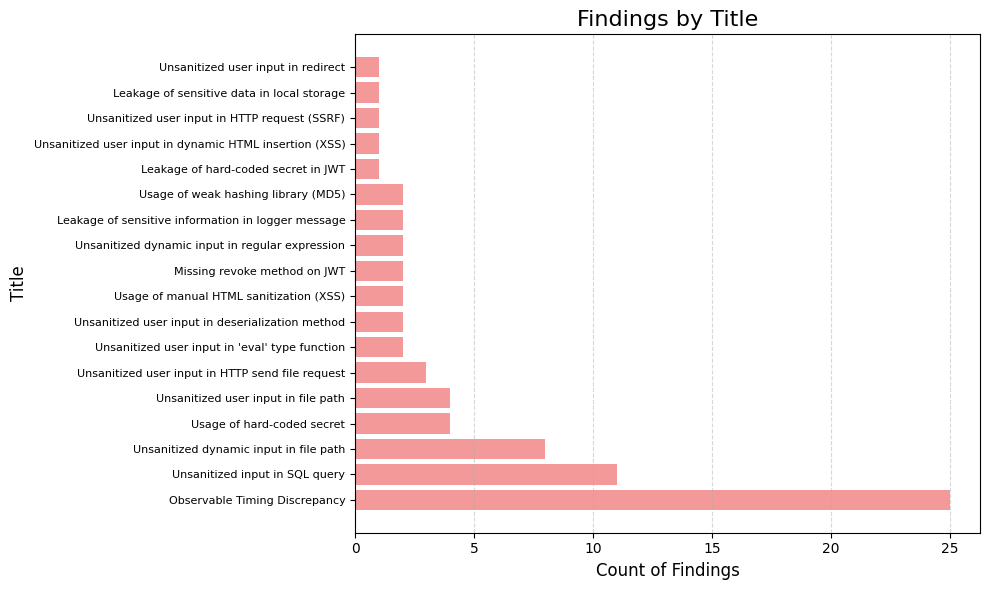

In [4]:
# Aggregate findings by `title`
title_counts = {}
for severity, findings in data.items():
    for finding in findings:
        title = finding["title"]
        title_counts[title] = title_counts.get(title, 0) + 1

# Sort titles by counts for better visualization
sorted_titles = sorted(title_counts.items(), key=lambda x: x[1], reverse=True)

# Separate keys and values for plotting
titles = [item[0] for item in sorted_titles]
counts = [item[1] for item in sorted_titles]

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(titles, counts, color="lightcoral", alpha=0.8)
plt.title("Findings by Title", fontsize=16)
plt.xlabel("Count of Findings", fontsize=12)
plt.ylabel("Title", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

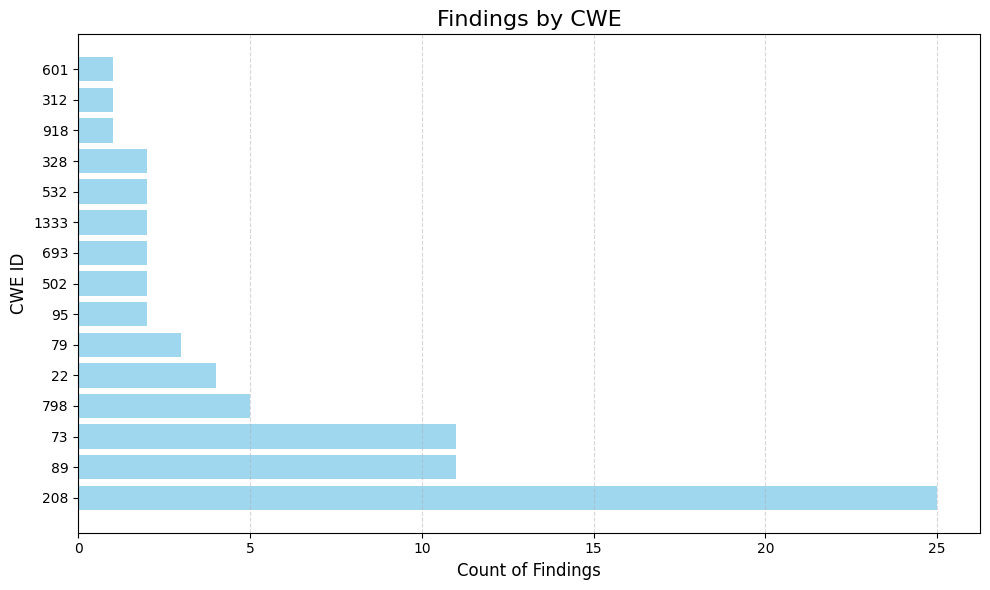

In [5]:
# Aggregate findings by `CWE`
cwe_counts = {}
for severity, findings in data.items():
    for finding in findings:
        for cwe_id in finding.get("cwe_ids", []):  # Handle multiple CWEs per finding
            cwe_counts[cwe_id] = cwe_counts.get(cwe_id, 0) + 1

# Sort CWEs by counts for better visualization
sorted_cwes = sorted(cwe_counts.items(), key=lambda x: x[1], reverse=True)

# Separate keys and values for plotting
cwe_ids = [item[0] for item in sorted_cwes]
counts = [item[1] for item in sorted_cwes]

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(cwe_ids, counts, color="skyblue", alpha=0.8)
plt.title("Findings by CWE", fontsize=16)
plt.xlabel("Count of Findings", fontsize=12)
plt.ylabel("CWE ID", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

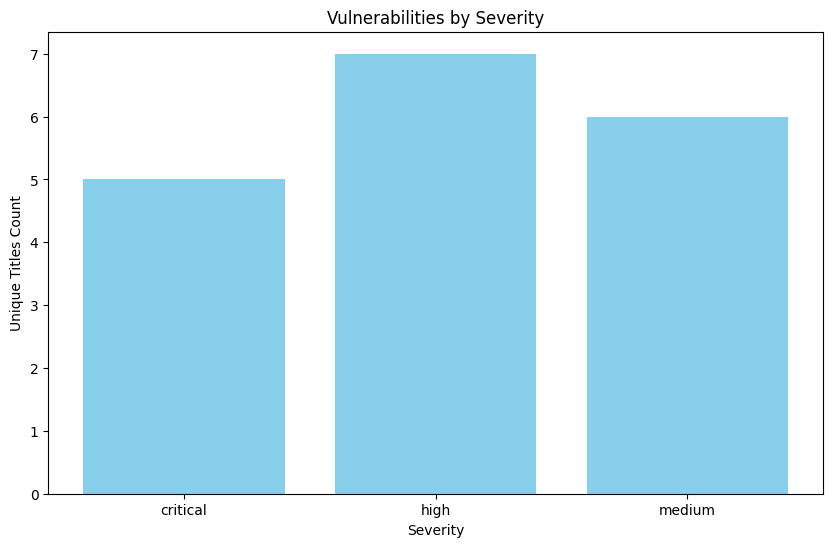


CRITICAL:
  - Leakage of hard-coded secret in JWT
  - Unsanitized input in SQL query
  - Unsanitized user input in 'eval' type function
  - Unsanitized user input in deserialization method
  - Usage of hard-coded secret

HIGH:
  - Leakage of sensitive data in local storage
  - Unsanitized dynamic input in file path
  - Unsanitized user input in HTTP request (SSRF)
  - Unsanitized user input in HTTP send file request
  - Unsanitized user input in dynamic HTML insertion (XSS)
  - Unsanitized user input in file path
  - Usage of manual HTML sanitization (XSS)

MEDIUM:
  - Leakage of sensitive information in logger message
  - Missing revoke method on JWT
  - Observable Timing Discrepancy
  - Unsanitized dynamic input in regular expression
  - Unsanitized user input in redirect
  - Usage of weak hashing library (MD5)


In [6]:
severity_data = {}

# If `data` is a dictionary grouped by severity
for severity, vulnerabilities in data.items():
    if severity not in severity_data:
        severity_data[severity] = set()
    for item in vulnerabilities:
        title = item["title"]
        severity_data[severity].add(title)

# Prepare data for plotting
severities = list(severity_data.keys())
counts = [len(severity_data[severity]) for severity in severities]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(severities, counts, color='skyblue')
plt.title("Vulnerabilities by Severity")
plt.xlabel("Severity")
plt.ylabel("Unique Titles Count")
plt.show()

# Print the de-duplicated titles for each severity
for severity, titles in severity_data.items():
    print(f"\n{severity.upper()}:")
    for title in sorted(titles):
        print(f"  - {title}")

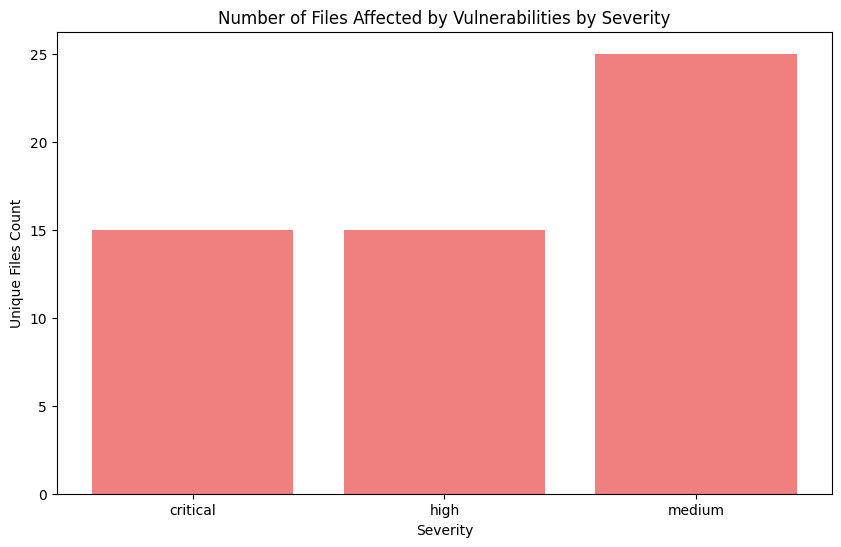


CRITICAL:
  - /src/data/static/codefixes/dbSchemaChallenge_1.ts
  - /src/data/static/codefixes/dbSchemaChallenge_3.ts
  - /src/data/static/codefixes/loginAdminChallenge_1.ts
  - /src/data/static/codefixes/loginBenderChallenge_1.ts
  - /src/data/static/codefixes/loginBenderChallenge_4.ts
  - /src/data/static/codefixes/loginJimChallenge_2.ts
  - /src/data/static/codefixes/loginJimChallenge_4.ts
  - /src/data/static/codefixes/unionSqlInjectionChallenge_1.ts
  - /src/data/static/codefixes/unionSqlInjectionChallenge_3.ts
  - /src/lib/insecurity.ts
  - /src/routes/b2bOrder.ts
  - /src/routes/login.ts
  - /src/routes/search.ts
  - /src/routes/vulnCodeFixes.ts
  - /src/routes/vulnCodeSnippet.ts

HIGH:
  - /src/data/static/codefixes/redirectChallenge_3.ts
  - /src/data/static/codefixes/restfulXssChallenge_2.ts
  - /src/data/staticData.ts
  - /src/frontend/src/app/login/login.component.ts
  - /src/frontend/src/hacking-instructor/index.ts
  - /src/lib/codingChallenges.ts
  - /src/lib/startup/val

In [7]:
severity_data = {}

# Assuming `data` is a dictionary grouped by severity
for severity, vulnerabilities in data.items():
    if severity not in severity_data:
        severity_data[severity] = set()
    for item in vulnerabilities:
        full_filename = item["full_filename"]
        severity_data[severity].add(full_filename)

# Prepare data for plotting
severities = list(severity_data.keys())
counts = [len(severity_data[severity]) for severity in severities]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(severities, counts, color='lightcoral')
plt.title("Number of Files Affected by Vulnerabilities by Severity")
plt.xlabel("Severity")
plt.ylabel("Unique Files Count")
plt.show()

# Print the unique filenames for each severity
for severity, filenames in severity_data.items():
    print(f"\n{severity.upper()}:")
    for filename in sorted(filenames):
        print(f"  - {filename}")

In [8]:
# Filter data for critical severity and group titles with related files
critical_data = {}

for item in data.get("critical", []):  # Assuming "critical" severity is available
    title = item["title"]
    full_filename = item["full_filename"]
    if title not in critical_data:
        critical_data[title] = set()  # Use a set to avoid duplicates
    critical_data[title].add(full_filename)

# Print the cross-check of titles and related files
print("CRITICAL Vulnerabilities Cross-Check:")
for title, filenames in critical_data.items():
    print(f"\nTitle: {title}")
    print("Affected Files:")
    for filename in sorted(filenames):
        print(f"  - {filename}")


CRITICAL Vulnerabilities Cross-Check:

Title: Usage of hard-coded secret
Affected Files:
  - /src/lib/insecurity.ts

Title: Unsanitized user input in 'eval' type function
Affected Files:
  - /src/routes/b2bOrder.ts

Title: Leakage of hard-coded secret in JWT
Affected Files:
  - /src/lib/insecurity.ts

Title: Unsanitized input in SQL query
Affected Files:
  - /src/data/static/codefixes/dbSchemaChallenge_1.ts
  - /src/data/static/codefixes/dbSchemaChallenge_3.ts
  - /src/data/static/codefixes/loginAdminChallenge_1.ts
  - /src/data/static/codefixes/loginBenderChallenge_1.ts
  - /src/data/static/codefixes/loginBenderChallenge_4.ts
  - /src/data/static/codefixes/loginJimChallenge_2.ts
  - /src/data/static/codefixes/loginJimChallenge_4.ts
  - /src/data/static/codefixes/unionSqlInjectionChallenge_1.ts
  - /src/data/static/codefixes/unionSqlInjectionChallenge_3.ts
  - /src/routes/login.ts
  - /src/routes/search.ts

Title: Unsanitized user input in deserialization method
Affected Files:
  - /sr